In [1]:
import os
import cv2
import pickle
import numpy as np
import math
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

Load video and all its fames into array

(Text(0.5, 1.0, 'First frame with a cat object to track'),
 <matplotlib.image.AxesImage at 0x2942e59c7f0>)

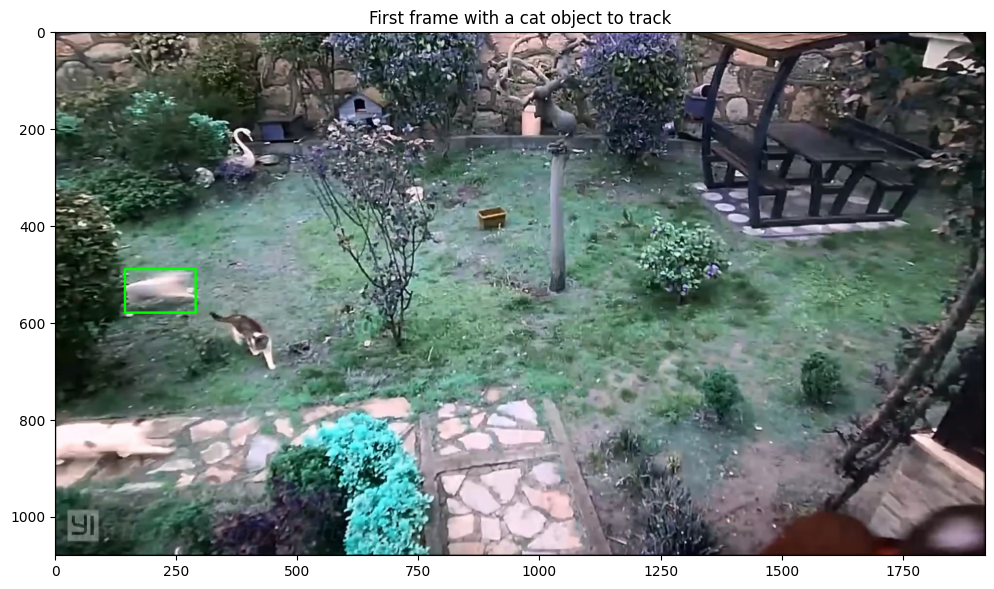

In [21]:
cats_short = cv2.VideoCapture("cats_short.mp4")

if not cats_short.isOpened():
    print("Error opening video file")

total_frames = int(cats_short.get(cv2.CAP_PROP_FRAME_COUNT))
frames = []

for i in range(total_frames):
    ret, frame = cats_short.read()
    if ret:
        frames.append(frame)
    else:
        break

cats_short.release()

capture = np.copy(frames[0])
x1, y1 = 144, 490
x2, y2 = 290, 580

cv2.rectangle(capture, (x1, y1), (x2, y2), (0, 255, 0), 4)
plt.title("First frame with a cat object to track"), plt.imshow(capture)

Show frames on which we gonna run our detector

12


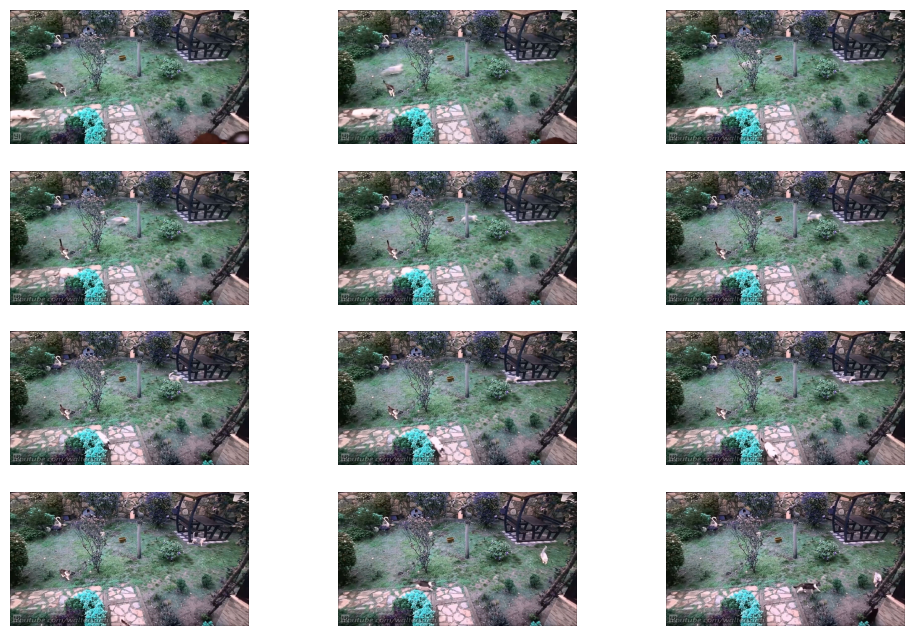

In [22]:
plt.rcParams['figure.figsize'] = [12, 8]
fig, axs = plt.subplots(nrows=4, ncols=3)
cnt = 0

for idx in range(0, total_frames, 8):
    plt_row = math.floor(cnt/3)
    plt_col = cnt%3
    axs[plt_row][plt_col].imshow(frames[idx])
    axs[plt_row][plt_col].axis('off')
    
    cnt += 1

print(cnt)

Initialize trackers

In [31]:
print(cv2.__version__)
tracker_types = ['MIL','KCF', 'CSRT']
tracker_type = tracker_types[2]

if tracker_type == 'MIL':
    tracker = cv2.TrackerMIL_create()

if tracker_type == 'KCF':
    tracker = cv2.TrackerKCF_create()

if tracker_type == "CSRT":
    tracker = cv2.TrackerCSRT_create()

tracking_init_bbox = (x1, y1, x2-x1, y2-y1)
ok = tracker.init(frames[0], tracking_init_bbox)

4.7.0


True (2, 4, 289, 577)
True (1, 4, 289, 577)
True (2, 4, 289, 577)
True (2, 3, 289, 577)
True (3, 3, 289, 577)
True (1, 2, 289, 577)
True (0, 2, 289, 577)
True (0, 2, 289, 577)
True (-1, 2, 289, 577)
True (0, 2, 289, 577)
True (-1, 2, 289, 577)
True (0, 2, 289, 577)
True (-1, 2, 289, 577)
True (0, 2, 289, 577)
True (-1, 2, 289, 577)
True (-1, 1, 289, 577)
True (0, 1, 289, 577)
True (1, 1, 289, 577)
True (0, 1, 289, 577)
True (0, 1, 289, 577)
True (1, 1, 289, 577)
True (-1, 2, 289, 577)
True (0, 2, 289, 577)
True (0, 2, 289, 577)
True (-1, 1, 289, 577)
True (-1, 2, 289, 577)
True (-1, 1, 289, 577)
True (-1, 1, 289, 577)
True (-1, 2, 289, 577)
True (-1, 1, 289, 577)
True (0, 1, 289, 577)
True (-1, 1, 289, 577)
True (-1, 1, 289, 577)
True (0, 2, 289, 577)
True (0, 1, 289, 577)
True (0, 1, 289, 577)
True (0, 1, 289, 577)
True (1, 2, 289, 577)
True (2, 2, 289, 577)
True (1, 2, 289, 577)
True (2, 2, 289, 577)
True (1, 2, 289, 577)
True (2, 2, 289, 577)
True (2, 3, 289, 577)
True (2, 2, 289, 5

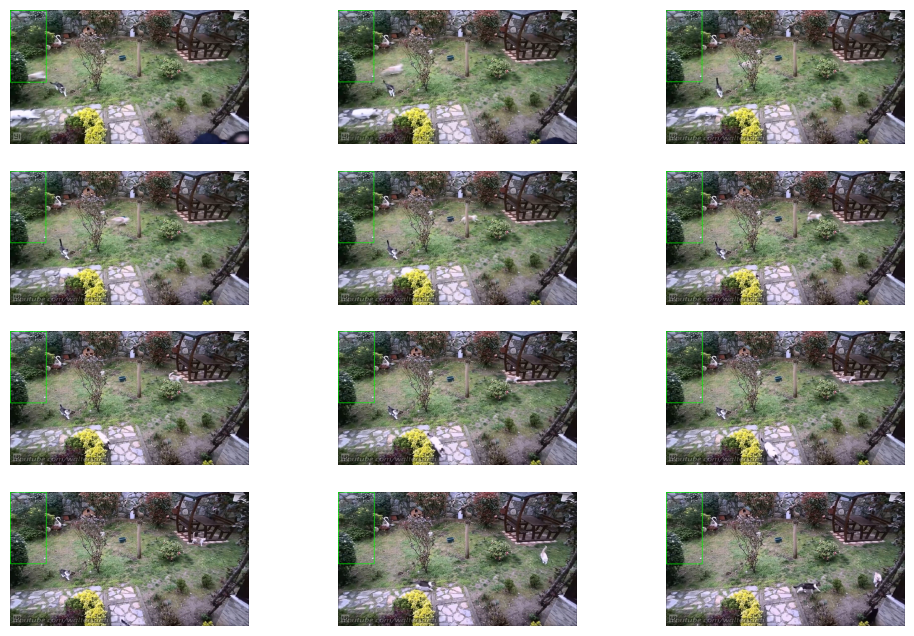

In [32]:
plt.rcParams['figure.figsize'] = [12, 8]
fig, axs = plt.subplots(nrows=4, ncols=3)
frame_counter = 0
control_frame_counter = 0

for item in frames:
    frame = cv2.cvtColor(np.copy(item), cv2.COLOR_BGR2RGB)

    ok, bbox = tracker.update(frame)
    print(ok, bbox)

    if frame_counter%8 == 0:
        plt_row = math.floor(control_frame_counter/3)
        plt_col = control_frame_counter%3
        x1, y1 = bbox[0], bbox[1]
        width, height = bbox[2], bbox[3]

        cv2.rectangle(frame, (x1, y1), (x1+width, y1+height), (0, 255, 0), 4)
        
        axs[plt_row][plt_col].imshow(frame)
        axs[plt_row][plt_col].axis('off')

        control_frame_counter += 1
    

    frame_counter += 1